In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
from scipy.signal import convolve2d

In [2]:
def DFT(data):
    N = data.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    return np.dot(W, data)

In [3]:
def InvDFT(data):
    """Compute the discrete Fourier Transform of the 1D array x"""
    
    N = data.shape[0]
    
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(2j * np.pi * k * n / N)
    return (1.0/N)*np.dot(W,data)

In [4]:
def FFT(data):
    
    len_N = data.shape[0]
    
    if len_N % 2 > 0:
        raise ValueError("size should be power of 2 ")
    elif len_N <= 4:  # this cutoff should be optimized
        return DFT(data)
    else:
        data_even = FFT(data[::2])
        data_odd = FFT(data[1::2])
        W = np.exp(-2j * np.pi * np.arange(len_N) / len_N)
        return np.concatenate([data_even + W[:len_N // 2] * data_odd,
                               data_even + W[len_N // 2:] * data_odd])


In [5]:
## checking dft with inbuild function 
data = np.random.random(64)
np.allclose(FFT(data), np.fft.fft(data))

True

In [6]:
def InvFFT(data):
    
    len_N = data.shape[0]
    
    if len_N % 2 > 0:
        raise ValueError("size should be power of 2 ")
    elif len_N <= 4:  # this cutoff should be optimized
        return InvDFT(data)
    else:
        data_even = InvFFT(data[::2])
        data_odd = InvFFT(data[1::2])
        W = np.exp(2j * np.pi * np.arange(len_N) / len_N)
        return (1/2)*np.concatenate([data_even + W[:len_N // 2] * data_odd,
                               data_even + W[len_N // 2:] * data_odd])


In [7]:
## checking ifft with inbulilt
data = np.random.random(2)
np.allclose(FFT(FFT(data)), np.fft.fft(np.fft.fft(data)))

True

In [8]:
#conver the image row wise 

In [9]:
def DFT_2d(img):
    [h,w] = img.shape

    #row wise dft
    dft_row = np.zeros([h,w],dtype=np.complex_)
    dft_col = np.zeros([h,w],dtype=np.complex_)
    img = np.asarray(img, dtype=float)
    for k in range(h):
        dft_row[k,:] = DFT(img[k,:])
        
    ## col wise dft 
    for l in range(w):
        dft_col[:,l] = DFT(dft_row[:,l])
    #print(dft_col)
    return dft_col

In [10]:
def IDFT_2d(img):
    [h,w] = img.shape

    #row wise dft
    idft_row = np.zeros([h,w],dtype=np.complex_)
    idft_col = np.zeros([h,w],dtype=np.complex_)
    img = np.asarray(img, dtype=float)
    for k in range(h):
        idft_row[k,:] = InvDFT(img[k,:])
    
    ## col wise dft 
    for l in range(w):
        idft_col[:,l] = InvDFT(idft_row[:,l])
    
    return idft_col

In [11]:
#conver the image row wise 
def FFT_2d(img):
    [h,w] = img.shape

    #row wise dft
    dft_row = np.zeros([h,w],dtype=np.complex_)
    dft_col = np.zeros([h,w],dtype=np.complex_)
    img = np.asarray(img, dtype=float)
    for k in range(h):
        dft_row[k,:] = FFT(img[k,:])
    
    ## col wise dft 
    for l in range(w):

        dft_row[:,l] = FFT(dft_row[:,l])
    
    return dft_row

In [12]:
## this is wrong 
def IFFT_2d(img):
    [h,w] = img.shape

    
    idft_row = np.zeros([h,w],dtype=np.complex_)
    idft_col = np.zeros([h,w],dtype=np.complex_)
    img = np.asarray(img, dtype=float)
    ## col wise dft 
    for l in range(w):
        idft_col[:,l] = InvFFT(img[:,l])
    #row wise dft    
    for k in range(h):
        idft_row[k,:] = InvFFT(idft_col[k,:])
    

    
    return idft_row

In [13]:
import sys
def downsample_img(img,factor):
    
    m= -1
    [rows,cols] = img.shape
    img_d = np.zeros([round(rows/factor),round(cols/factor)],dtype='float')
    for i in range (0,rows,factor):
        n=0
        m = m+1
        for j in range(0,cols,factor):
            
            img_d[m,n] = img[i,j]
            n=n+1
    

    
    return img_d

### Read image input lina image

In [14]:
img = cv2.imread('../input/checker.png',0)

img.shape

(256, 256)

In [15]:
img = downsample_img(img,4)
img.shape

(64, 64)

#### ans1.1   applying 2d DFT on image, shifting and taking log 

In [16]:
dft_img  = FFT_2d(img)
dft_img_center =  np.fft.fftshift(abs(dft_img))

dft_display = np.log10(dft_img_center)

numpy_dft = np.fft.fft2(img)  
numpy_dft_center =  np.fft.fftshift(abs(numpy_dft))
numpy_dft_display = np.log10(numpy_dft_center)

np.allclose(dft_display, numpy_dft_display)

True

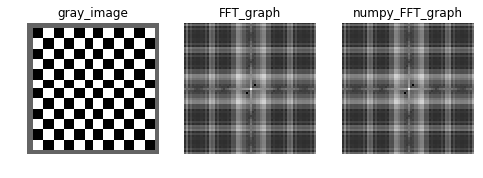

In [17]:
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("gray_image")
plt.imshow(img,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("FFT_graph")
plt.imshow(dft_display,cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("numpy_FFT_graph")
plt.imshow(numpy_dft_display,cmap='gray')

### Ans1.2 log transform 
We apply Log transform on fft image 
The log transformations can be defined by this formula
s = c log(r + 1).
During log transformation, the dark pixels in an image are expanded as compare to the higher pixel values. The higher pixel values are kind of compressed in log transformation




### Ans 1.3  
we perform the fft of fft in image we get the same image but pixel value get shifted.

DFT(x)DFT((x[0],x[1],⋯,x[N−1]))=Xi.e.=(X[0],X[1],⋯,X[N−1]), then


DFT(DFT((x[0],x[1],⋯,x[N−1])))=(x[0],x[N−1],x[N−2]⋯,x[2],x[1])

in first fft result if we keep the x[0] and flip the image verticaly and horizontaly it will reconstruct the input image.

In [18]:
img = cv2.imread('../input/lena.bmp',0)

img.shape
img = downsample_img(img,8)
img.shape

(64, 64)

In [19]:
#img_1 = np.fft.fft2(img)
img_1 = FFT_2d(img)
temp = np.flip(img_1[:,1:],1)     ## veritical flipw  , except first column
img_1[:,1:] = temp
temp = np.flip(img_1[1:,:],0)     ## horizontal flip flipw, except first row
img_1[1:,:] = temp
img_2 = abs(np.fft.fft2(img_1))
#img_2 = abs(IFFT_2d(img_1))
img_2 = (img_2/np.max(np.max(img_2)))*255
img_2 = img_2.astype('uint8')


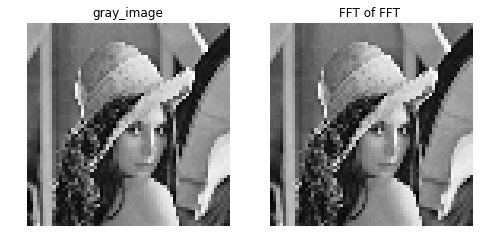

In [21]:
fig=plt.figure(figsize=(8, 8))
columns =2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("gray_image")
plt.imshow(img,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("FFT of FFT ")
plt.imshow(img_2,cmap='gray')

#np.allclose(x, ind(x))


In [21]:
### the zeros on image all side edges by number 
def zeros_padding(img,number):
    [h,w] =  img.shape
    out_img = np.zeros([h+2*number,w+ 2*number],dtype='float')
    
    out_img[number:number+h,number:number+w] = img
    return out_img
    
    
    

In [22]:
def upsample_img(img,factor):
    
   
    [rows,cols] = img.shape
    img_d = np.zeros([(rows*factor),cols*factor],dtype='float')
    
    for i in range (0,rows*factor):
        m=math.floor(i/factor)
        
        for j in range(0,cols*factor):
            n=math.floor(j/factor)
            img_d[i,j] = img[m,n]
               
    return img_d

In [23]:
def DFT_display(dft_img):

    dft_img_center =  np.fft.fftshift(abs(dft_img))

    dft_display = np.log10(dft_img_center)
    return dft_display



## Ans  3

In [24]:
img = cv2.imread('../input/lena.bmp',0)
img1 = downsample_img(img,8)
print(img1.shape)

#img = upsample_img(img,2)


number = [0,32,64,128]
#factor = [1,1,2,4]
factor = [8,8,4,2]
#factor = [64,64,128,256]
columns =2
rows = 2
count = 1


(64, 64)


(64, 64)
(128, 128)
(256, 256)
(512, 512)


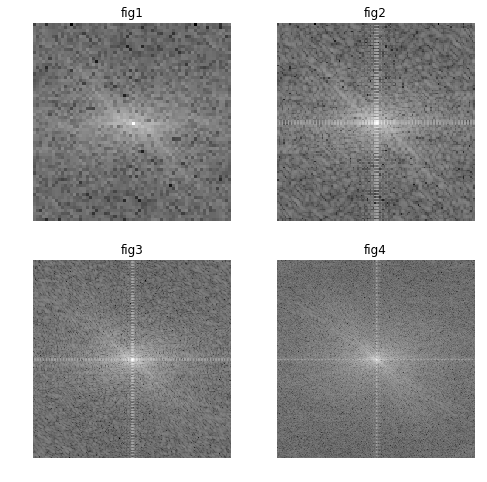

In [25]:
fig=plt.figure(figsize=(8, 8))
for num,fac in zip(number,factor):  
    img_d = downsample_img(img,fac) ## upsample image 
    #img_d = np.resize(img1,[fac,fac])
    img_z = zeros_padding(img_d,num) ## zeros paddding 
    print(img_z.shape)
    dft_img  = FFT_2d(img_z)
    dft_display = DFT_display(dft_img)
    fig.add_subplot(rows, columns, count)
    plt.axis("off")
    plt.title('fig' + str (count))
    plt.imshow(dft_display,cmap='gray')
    count = count+1   

#### the above fig 1 is fft of image fig 2 create plus type sign in image due edge zero padding, figure 3 contain more frequencies due to upsampling and  zero padding, and 4th also is the same case as figure 3 upsampling and zeros so more frequencies are there as compared to 3.  

### Ans 4.1

In [26]:
def conv_filter(img,mask,mode):
    
    ## flip the mask 
    mask = np.flip(mask,0)
    mask = np.flip(mask,1)
    
    [rows,cols] = img.shape
    #out_img = np.zeros([rows,cols],dtype='float')
    
    
    window_size = mask.shape
    print(window_size[0],window_size[1])
    PadM=math.floor((window_size[0])/2)
    PadN=math.floor((window_size[1])/2)
    pad_img = []
    ##FIND THE NUMBER OF ROWS AND COLUMNS TO BE PADDED WITH ZERO

    pad_img = np.pad(img,[window_size[0],window_size[1]],'constant', constant_values=(0, 0))
    [rows1,cols1] = pad_img.shape
    #out_img1 = np.zeros([rows+PadM+1,cols+PadN+1],dtype='float')
    
    
    

    if(mode=='full'):
        out_img1 = np.zeros([rows+window_size[0]-1,cols+window_size[1]-1],dtype='float')        
        for i in range(rows+window_size[0]-1):
            for j in range(cols+window_size[1]-1):
                
                window = pad_img[i+1:i+window_size[0]+1,j+1:j+window_size[1]+1]
                
                
                value = np.sum(np.ravel(np.multiply(mask,window)))
                
                out_img1[i,j] = value
        return out_img1
    if(mode=='valid'):
        out_img = np.zeros([rows-window_size[0]+1,cols-window_size[1]+1],dtype='float')
        for i in range(window_size[0]-1, rows):
            for j in range(window_size[1]-1,cols):               
                window = img[i-window_size[0]+1:i+1,j-window_size[1]+1:j+1]
                
                value = np.sum(np.ravel(np.multiply(mask,window)))
                
                out_img[i-window_size[0]+1,j-window_size[1]+1] = value
        return out_img      

In [27]:
img = cv2.imread('../input/lena.bmp',0)
img1 = downsample_img(img,2)
print(img1.shape)
img2 = cv2.imread('../input/checker.png',0)
print(img2.shape)


#re = conv_filter(img2,img1,'valid')
#print(re.shape)

(256, 256)
(256, 256)


In [28]:
## validating conv result
img = cv2.imread('../input/lena.bmp',0)
img1 = downsample_img(img,64)
print(img1.shape)
img2 = cv2.imread('../input/checker.png',0)
img2 = downsample_img(img2,64)
img2 = np.resize(img2,[3,3])
print(img2.shape)
re1 = conv_filter(img1,img2,mode='full')
re2 = convolve2d(img1,img2,'full')
np.allclose(re1, re2)

(8, 8)
(3, 3)
3 3


True

In [29]:
img = cv2.imread('../input/lena.bmp',0)
img1 = downsample_img(img,2)
print(img1.shape)
img2 = cv2.imread('../input/checker.png',0)
img2 = downsample_img(img2,1)
img1_fft = np.fft.fft2(img1)
img2_fft = np.fft.fft2(img2)

img_back1 = np.fft.ifft2(np.multiply(img1_fft,img2_fft))
#img_back1.shape
#img_back2 = conv_filter(img1,img2,'valid')

cnv_img = conv_filter(img1,img2,'full')
img_back2 = cnv_img[128:128+256,128:128+256] 
#img_back2.shape
error = np.mean(np.power((abs(img_back1) - img_back2),2))
print("mean square diffrence betwenn pixels" ,error)
np.allclose(img_back1, img_back2)

(256, 256)
256 256
mean square diffrence betwenn pixels 2.149731501703885e+17


False

#### Ans 4.2 

In [30]:
img = cv2.imread('../input/lena.bmp',0)
img1 = downsample_img(img,2)
print(img1.shape)
img2 = cv2.imread('../input/hc1.jpeg',0)
img2 = np.resize(img2,[4,4])
print(img2.shape)


import time
start_time = time.time()
result3 = conv_filter(img1,img2,'full')
print("special_conv--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
m, n = img1.shape[0] + img2.shape[0] - 1, img1.shape[1] + img2.shape[1] - 1

result4 = np.fft.ifft2(np.multiply(np.fft.fft2(img1,[m,n]), np.fft.fft2(img2,[m,n])) )
#print("fft result")
print("fft_conv--- %s seconds ---" % (time.time() - start_time))



np.allclose(result3, result4)

(256, 256)
(4, 4)
4 4
special_conv--- 0.36301398277282715 seconds ---
fft_conv--- 0.015540838241577148 seconds ---


True

### fft_convolution is much faster as comapred to special convolution 

### Ans 4.3

In [31]:
img = cv2.imread('../input/lena.bmp',0)
img1 = downsample_img(img,2)
print(img1.shape)
img2 = cv2.imread('../input/hc1.jpeg',0)
img2 = np.resize(img2,[8,8])
print(img2.shape)


import time
start_time = time.time()
result1 = conv_filter(img1,img2,'full')
print("special_conv--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
m, n = img1.shape[0] + img2.shape[0] - 1, img1.shape[1] + img2.shape[1] - 1

result2 = np.fft.ifft2(np.multiply(np.fft.fft2(img1,[m,n]), np.fft.fft2(img2,[m,n])) )
#print("fft result")
print("fft_conv--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
result3 = convolve2d(img1,img2,'full')
print("scipy_conv--- %s seconds ---" % (time.time() - start_time))

(256, 256)
(8, 8)
8 8
special_conv--- 0.3871734142303467 seconds ---
fft_conv--- 0.10211896896362305 seconds ---
scipy_conv--- 0.009697914123535156 seconds ---


### Scipy convolution is fastest convolutions in above three implementation 

### Ans4.4 


In [32]:
img = cv2.imread('../input/lena.bmp',0)
img1 = downsample_img(img,2)
print(img1.shape)
img2 = cv2.imread('../input/hc1.jpeg',0)
img2 = np.resize(img2,[256,256])
print(img2.shape)

## perform the padding 
img3 = zeros_padding(img1,128)
img4 = zeros_padding(img2,128)
print(img3.shape)

start_time = time.time()
fft_1 = np.fft.ifft2(img3)
fft_2 = np.fft.ifft2(img4)
print("time to calculate 2 512 size image fft--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
m, n = img3.shape[0] + img4.shape[0] - 1, img3.shape[1] + img4.shape[1] - 1

result2 = np.fft.ifft2(np.multiply(np.fft.fft2(img1,[m,n]), np.fft.fft2(img2,[m,n])) )
result2.shape
print("time to calculate 512 size image covolution using fft--- %s seconds ---" % (time.time() - start_time))

print("sum of all valuess above 512 value are very less value", np.sum(np.sum(abs(result2[512:,:]))),np.sum(np.sum(abs(result2[:,512:]))) )

(256, 256)
(256, 256)
(512, 512)
time to calculate 2 512 size image fft--- 0.023698806762695312 seconds ---
time to calculate 512 size image covolution using fft--- 0.23238182067871094 seconds ---
sum of all valuess above 512 value are very less value 0.09444520637172651 0.08560597661919028


### answer 5

In [33]:
img = cv2.imread('../input/checkerboard.png',0)
img1 = downsample_img(img,2)
img2 = downsample_img(img,4)
img3 = upsample_img(img,2)
img_fft = FFT_2d(img)
img_fft = DFT_display(img_fft)

img1_fft = FFT_2d(img1)
img1_fft = DFT_display(img1_fft)

img2_fft = FFT_2d(img2)
img2_fft = DFT_display(img2_fft)

img3_fft = FFT_2d(img3)
img3_fft = DFT_display(img3_fft)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


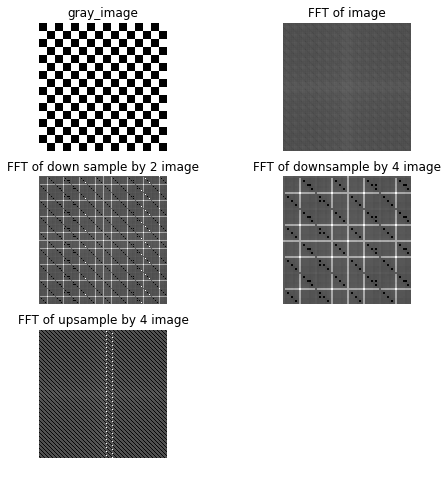

In [34]:
fig=plt.figure(figsize=(8, 8))
columns =2
rows = 3
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("gray_image")
plt.imshow(img,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("FFT of image")
plt.imshow(img_fft,cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("FFT of down sample by 2 image")
plt.imshow(img1_fft,cmap='gray')
fig.add_subplot(rows, columns, 4)
plt.axis("off")
plt.title("FFT of downsample by 4 image")
plt.imshow(img2_fft,cmap='gray')
fig.add_subplot(rows, columns, 5)
plt.axis("off")
plt.title("FFT of upsample by 4 image")
plt.imshow(img3_fft,cmap='gray')

### we can se in result for fft sampling Nx and Ny need to be 256 or above if we are down sampleing the image from 256 we are loosing the frequency content in image. 